In [42]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('data/gregrafferty_2019-11-20.csv')

In [44]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(data['created_time'])
df['y'] = data['likes']

In [45]:
cap = 1000
floor = 0
df['cap'] = cap
df['floor'] = floor

In [46]:
df.head()

,ds,y,cap,floor
0,2019-09-19 16:10:00,360,1000,0
1,2019-09-11 17:35:00,311,1000,0
2,2019-09-05 00:20:00,634,1000,0
3,2019-08-31 15:44:00,682,1000,0
4,2019-08-29 22:21:00,902,1000,0


In [47]:
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(df)

In [48]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1833,2020-09-14 16:10:00
1834,2020-09-15 16:10:00
1835,2020-09-16 16:10:00
1836,2020-09-17 16:10:00
1837,2020-09-18 16:10:00


In [49]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1833,2020-09-14 16:10:00,797.462743,559.767324,1035.665201
1834,2020-09-15 16:10:00,813.555826,559.668403,1061.988302
1835,2020-09-16 16:10:00,797.839818,558.160415,1045.519072
1836,2020-09-17 16:10:00,794.742757,541.846753,1032.231743
1837,2020-09-18 16:10:00,791.589660,551.762650,1041.618432


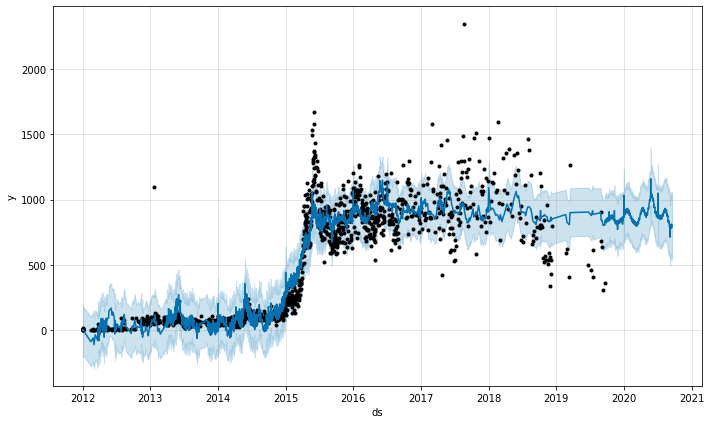

In [50]:
fig1 = m.plot(forecast)

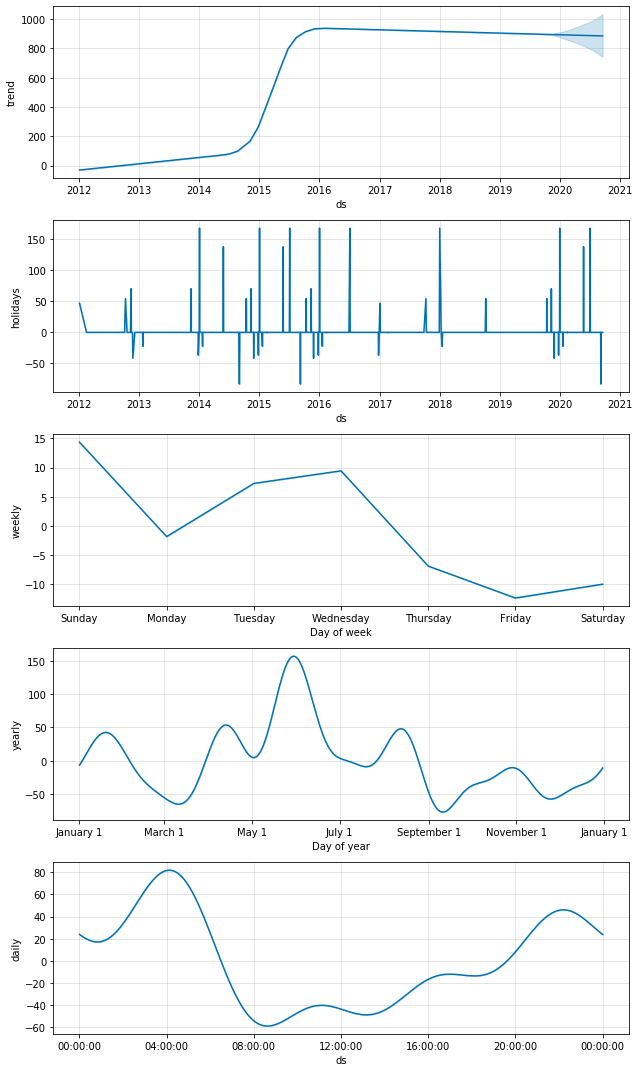

In [51]:
fig2 = m.plot_components(forecast)

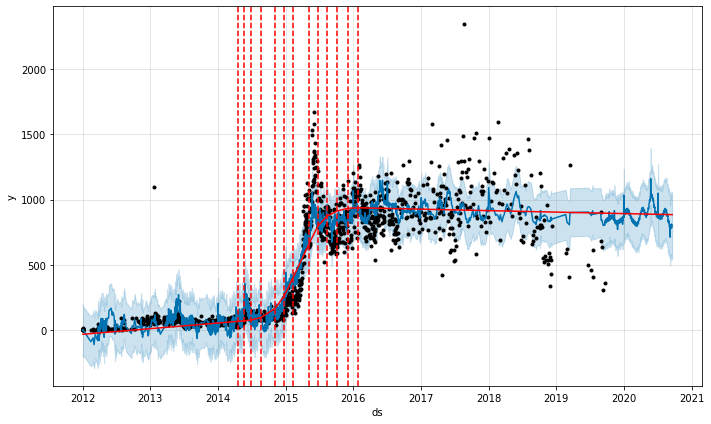

In [52]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [53]:
m = Prophet(mcmc_samples=1000)
m.add_country_holidays(country_name='US')
m.fit(df)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [54]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1833,2020-09-14 16:10:00
1834,2020-09-15 16:10:00
1835,2020-09-16 16:10:00
1836,2020-09-17 16:10:00
1837,2020-09-18 16:10:00


In [55]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1833,2020-09-14 16:10:00,791.108331,500.821442,1062.361449
1834,2020-09-15 16:10:00,807.934730,518.945147,1094.788063
1835,2020-09-16 16:10:00,791.347905,502.267879,1072.125277
1836,2020-09-17 16:10:00,788.722822,507.119182,1077.162502
1837,2020-09-18 16:10:00,785.578611,518.735842,1065.145415


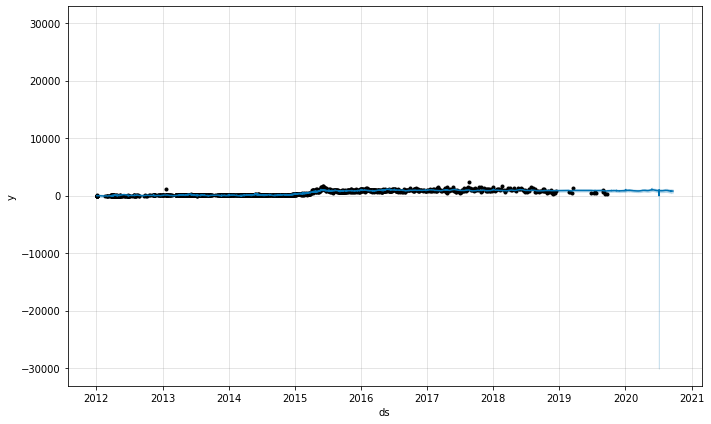

In [56]:
fig1 = m.plot(forecast)

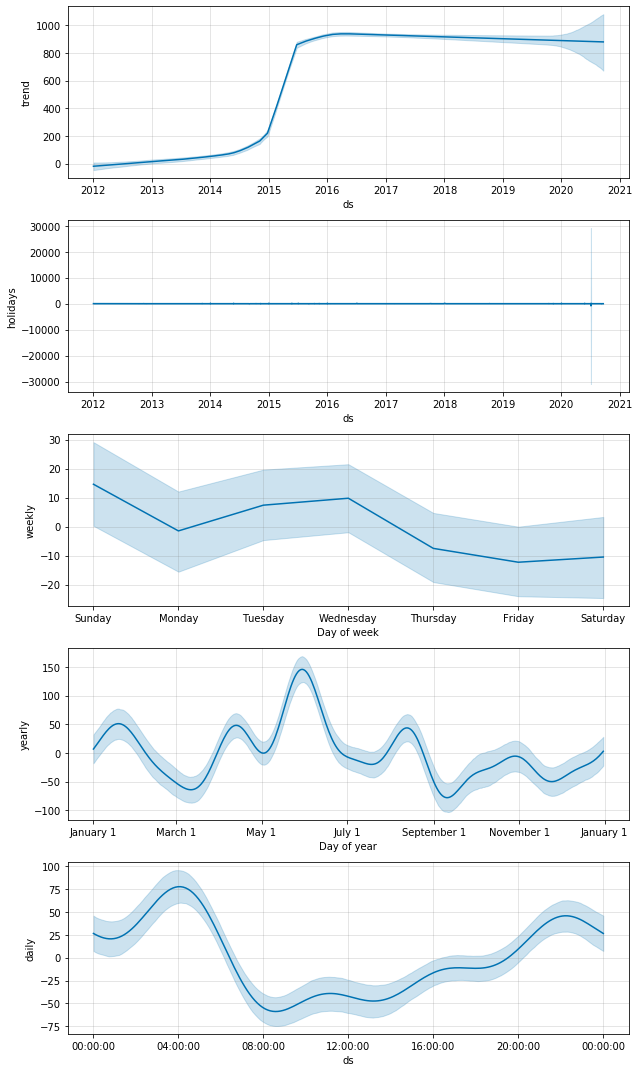

In [57]:
fig2 = m.plot_components(forecast)

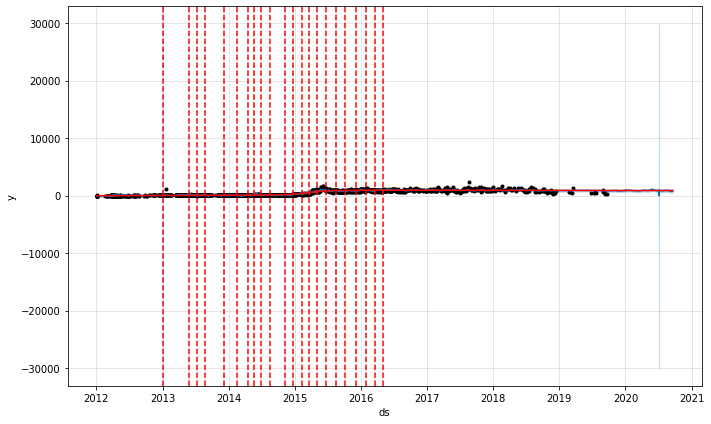

In [58]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [59]:
# Remove outliers
df.loc[(df['ds'] > pd.to_datetime('2013-06-06').date()) & (df['ds'] < pd.to_datetime('2013-06-15').date()), 'y'] = None
df.loc[(df['ds'] > pd.to_datetime('2014-05-25').date()) & (df['ds'] < pd.to_datetime('2014-06-15').date()), 'y'] = None
df.loc[(df['ds'] > pd.to_datetime('2015-05-23').date()) & (df['ds'] < pd.to_datetime('2015-06-23').date()), 'y'] = None

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the cu

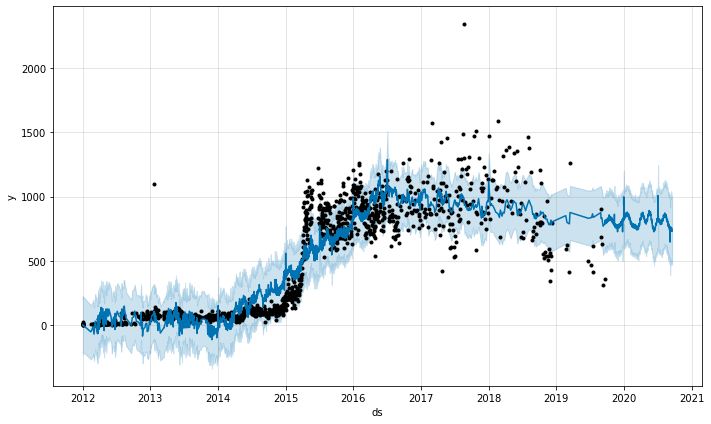

In [60]:
m = Prophet(n_changepoints=3)
m.add_country_holidays(country_name='US')
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(m.predict(future))

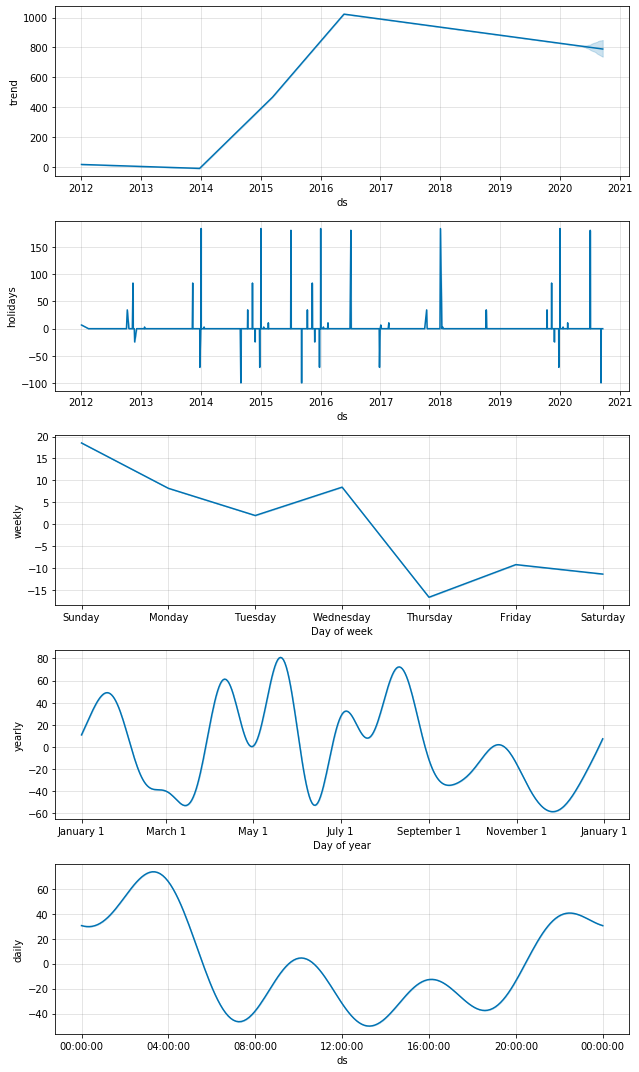

In [61]:
fig2 = m.plot_components(forecast)

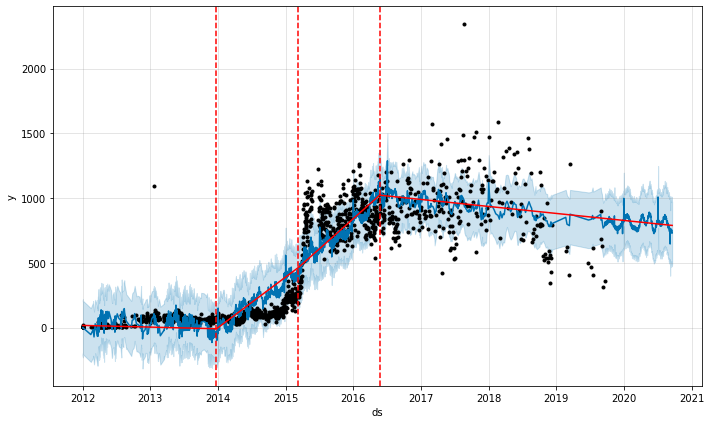

In [62]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

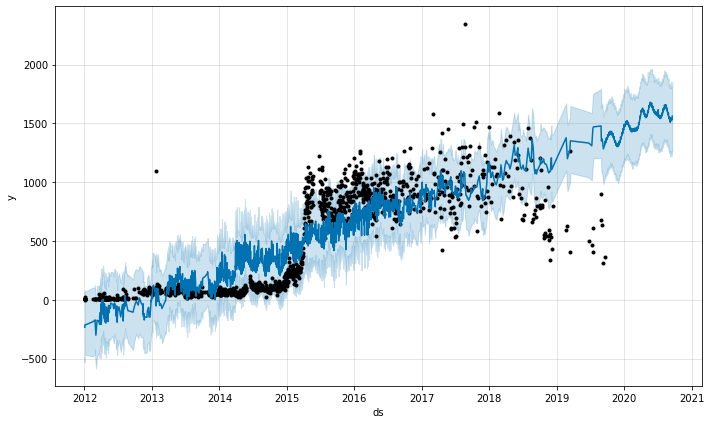

In [63]:
m = Prophet(changepoint_prior_scale=0.001)
m.add_country_holidays(country_name='US')
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)

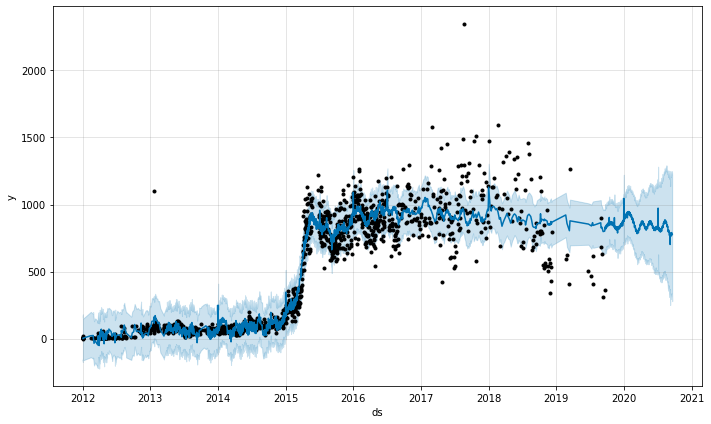

In [64]:
m = Prophet(changepoint_prior_scale=0.5)
m.add_country_holidays(country_name='US')
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)

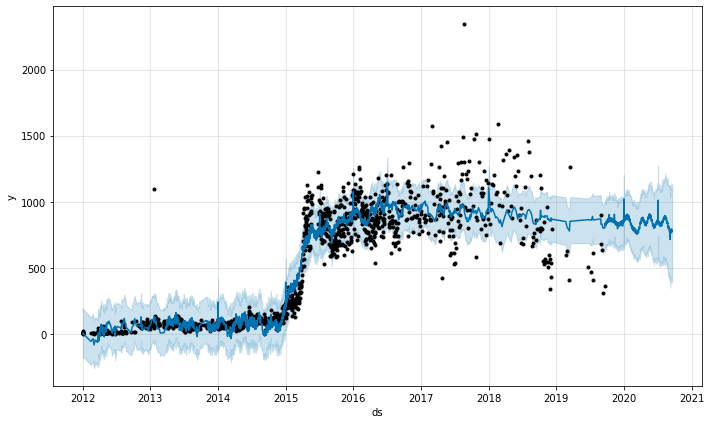

In [65]:
m = Prophet(daily_seasonality=True, changepoint_prior_scale=0.5, n_changepoints=7)
m.add_country_holidays(country_name='US')
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig = m.plot(forecast)

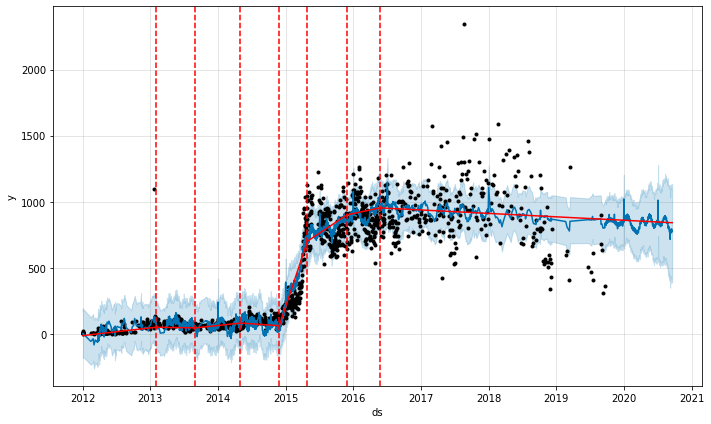

In [66]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [67]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 10 forecasts with cutoffs between 2014-04-13 16:10:00 and 2018-09-19 16:10:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-04-13 17:54:00,55.963112,-5.523139,117.564171,39.0,2014-04-13 16:10:00
1,2014-04-14 05:57:00,57.868230,-6.540918,121.706869,38.0,2014-04-13 16:10:00
2,2014-04-15 06:38:00,55.035690,-8.822141,117.394187,33.0,2014-04-13 16:10:00
3,2014-04-16 06:56:00,60.833037,-4.927000,120.509378,45.0,2014-04-13 16:10:00
4,2014-04-16 11:39:00,42.636134,-22.629364,103.590956,31.0,2014-04-13 16:10:00


In [68]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,26 days 18:54:00,52102.223927,228.259116,162.573166,0.299242,0.500000
1,27 days 03:51:00,52233.283796,228.546021,163.345087,0.297542,0.494318
2,27 days 04:53:00,52218.811293,228.514357,163.226827,0.297053,0.500000
3,27 days 15:28:00,52220.737689,228.518572,163.326136,0.297146,0.500000
4,27 days 18:40:00,52318.904787,228.733261,163.968570,0.295040,0.494318


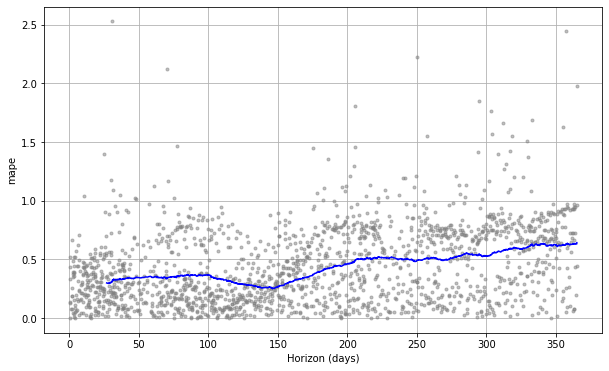

In [69]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

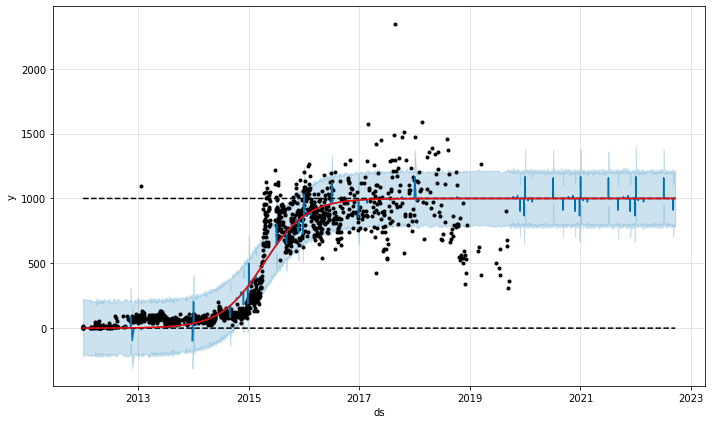

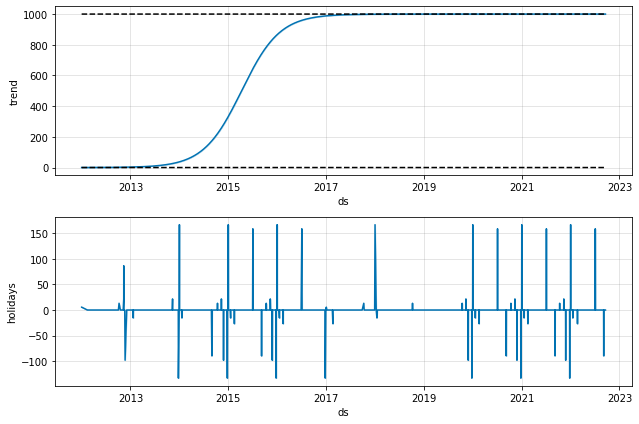

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-03-29 16:10:00 and 2016-09-19 16:10:00


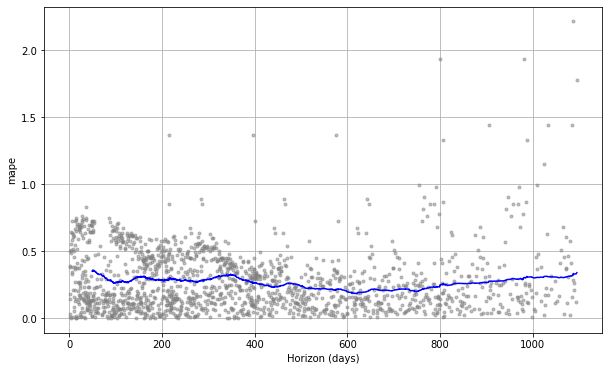

mape: 26.77%


In [70]:
prophet = Prophet(growth='logistic',
                  changepoints=['2015-01-01',
                                '2015-03-14',
                                '2015-06-03',
                                '2015-08-30'],
                  n_changepoints=25,
                  changepoint_range=0.95,
                  yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                  holidays=None,
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.01,
                  mcmc_samples=0)
prophet.add_country_holidays(country_name='US')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=1095, freq='D')
future['cap'] = cap
future['floor'] = floor
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '1095 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

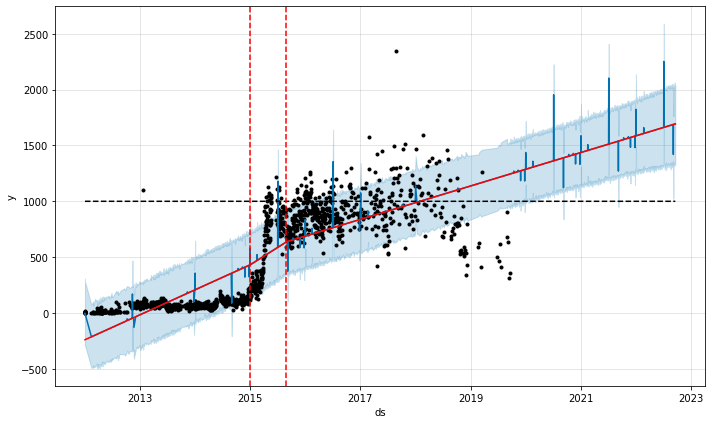

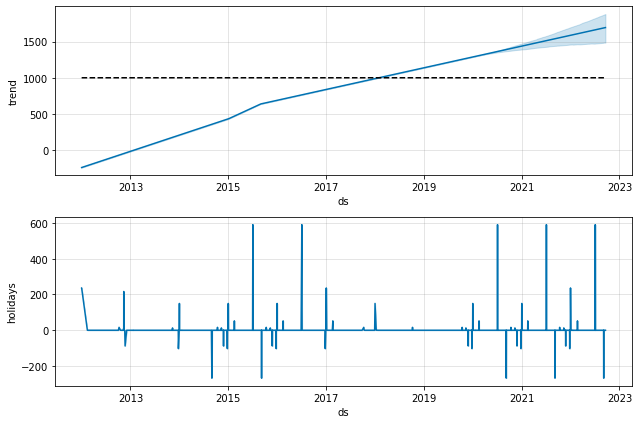

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-03-29 16:10:00 and 2016-09-19 16:10:00


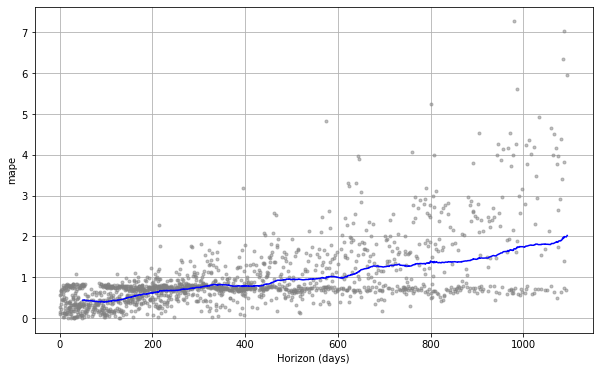

mape: 87.71%


In [71]:
prophet = Prophet(growth='linear',
                  changepoints=['2015-01-01',
                                '2015-03-14',
                                '2015-06-03',
                                '2015-08-30'],
                  n_changepoints=25,
                  changepoint_range=0.95,
                  yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                  holidays=None,
                  seasonality_mode='additive',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.01,
                  mcmc_samples=0)
prophet.add_country_holidays(country_name='US')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=1095, freq='D')
future['cap'] = cap
future['floor'] = floor
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '1095 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

In [72]:
df.head()

,ds,y,cap,floor
0,2019-09-19 16:10:00,360.0,1000,0
1,2019-09-11 17:35:00,311.0,1000,0
2,2019-09-05 00:20:00,634.0,1000,0
3,2019-08-31 15:44:00,682.0,1000,0
4,2019-08-29 22:21:00,902.0,1000,0


In [73]:
df['growth'] = 0
df.loc[(df['ds'] >= pd.to_datetime('2014-12-13')) & (df['ds'] <= pd.to_datetime('2015-06-08')), 'growth'] = 1
df['new_stable'] = 0
df.loc[(df['ds'] >= pd.to_datetime('2015-06-08')), 'new_stable'] = 1

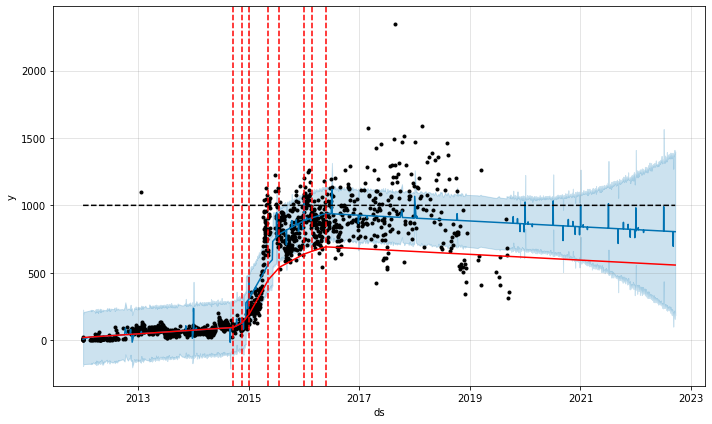

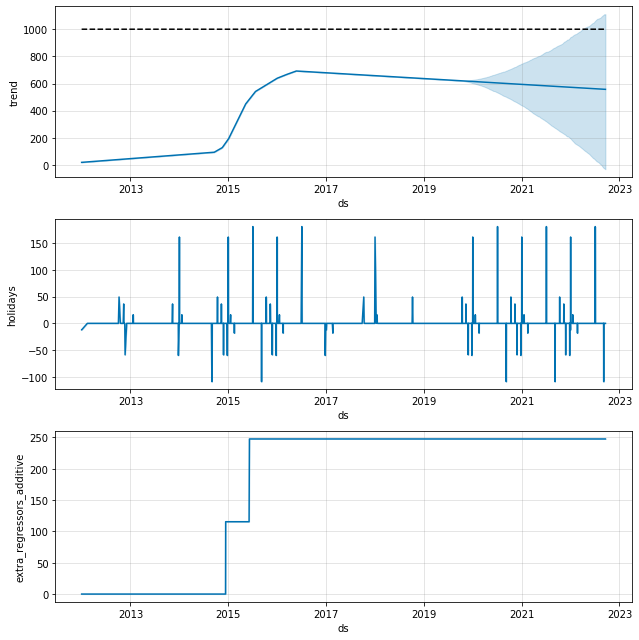

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-03-29 16:10:00 and 2016-09-19 16:10:00


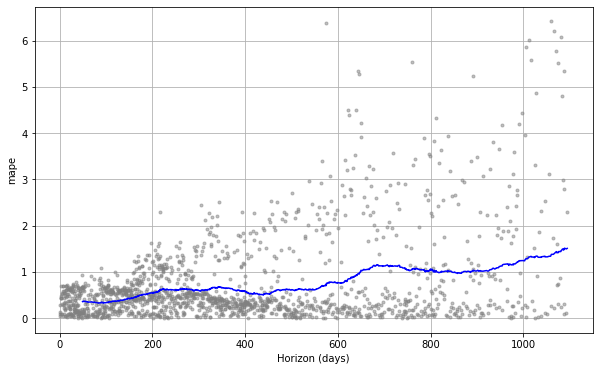

mape: 68.13%


In [74]:
prophet = Prophet(yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False,
                  changepoint_prior_scale=.05)

prophet.add_country_holidays(country_name='US')

prophet.add_regressor('growth')
prophet.add_regressor('new_stable')

prophet.fit(df)
future = prophet.make_future_dataframe(periods=1095)

future['growth'] = 0
future.loc[(future['ds'] >= pd.to_datetime('2014-12-13')) & (future['ds'] <= pd.to_datetime('2015-06-08')), 'growth'] = 1
future['new_stable'] = 0
future.loc[(future['ds'] >= pd.to_datetime('2015-06-08')), 'new_stable'] = 1

future['cap'] = cap
future['floor'] = floor

forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '1095 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))

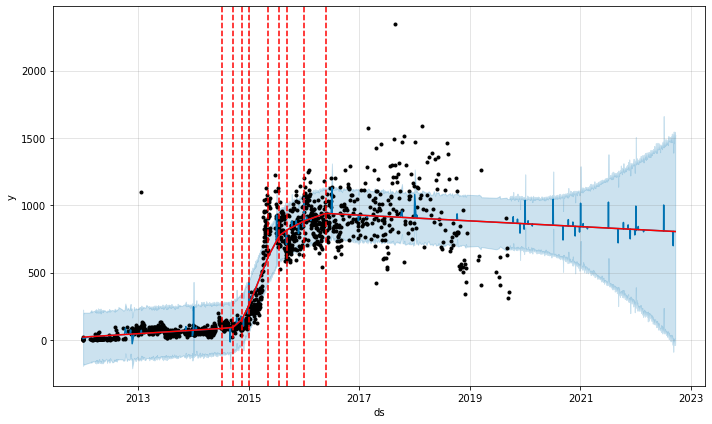

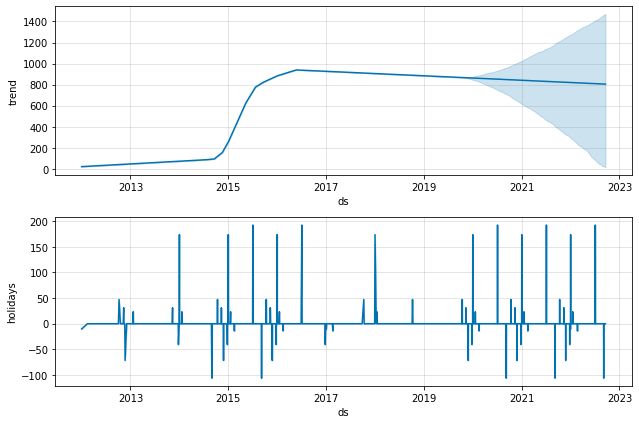

INFO:fbprophet:Making 4 forecasts with cutoffs between 2015-03-29 16:10:00 and 2016-09-19 16:10:00


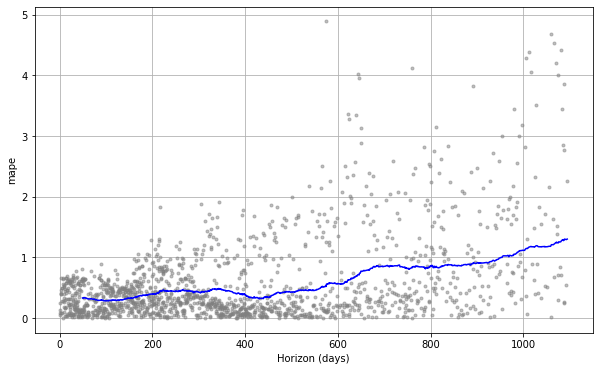

mape: 52.55%


In [75]:
prophet = Prophet(yearly_seasonality=False,
                  weekly_seasonality=False,
                  daily_seasonality=False)

prophet.add_country_holidays(country_name='US')
prophet.fit(df)
future = prophet.make_future_dataframe(periods=1095)
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
fig2 = prophet.plot_components(forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '1095 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()
print('mape:', '{:.2f}%'.format(100 * df_p['mape'].mean()))